In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [95]:
# Read train data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [96]:
# Explatory data analysis
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
train_data.shape

(891, 12)

In [98]:
train_data.ndim

2

In [99]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [101]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


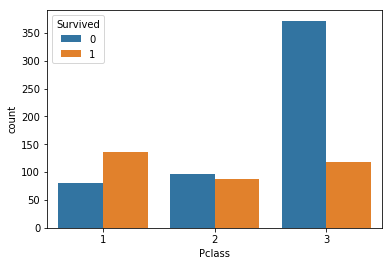

In [102]:
# Data visualization

# By plotting a count plot of passenger class with respect to Survived, we can see that class is highly correlated with the survival 
# (most of first class passengers survived)
sns.countplot(x='Pclass', hue='Survived', data=train_data)

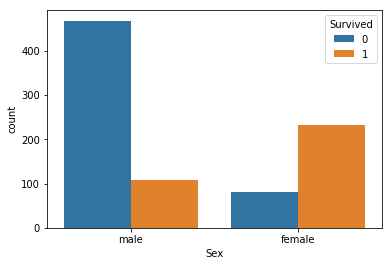

In [103]:
# Sex vs Survived shows larger portion of females survived compared to males
sns.countplot(x='Sex', hue='Survived', data=train_data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


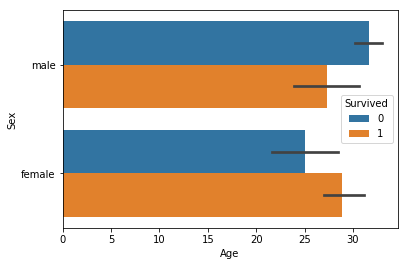

In [104]:
sns.barplot(x='Age', y='Sex', hue='Survived', data=train_data)

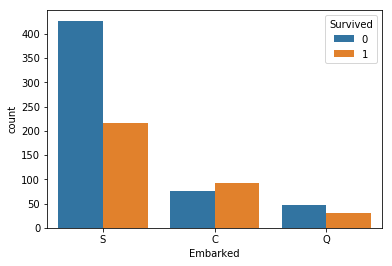

In [105]:
sns.countplot(x='Embarked', hue='Survived', data=train_data)

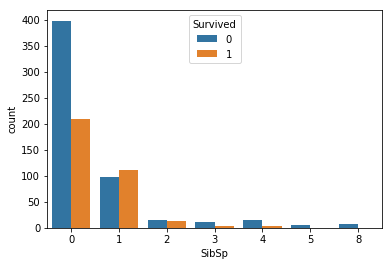

In [106]:
sns.countplot(x='SibSp', hue='Survived', data=train_data)

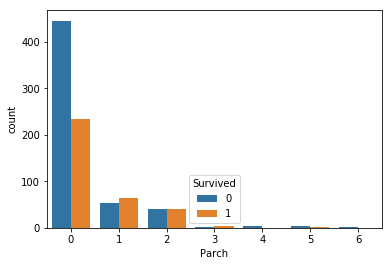

In [107]:
sns.countplot(x='Parch', hue='Survived', data=train_data)

In [77]:
# Data cleaning

def get_nan(data, feature):
    return data[data[feature].isnull()]

def print_nan(data):
    for feature in data.columns:
        print('{0}: {1}'.format(feature, len(get_nan(data, feature))))

print('NaN values before cleaning')
# As we can see from the results, we have some missing data for Age, Cabin and Embarked.
print_nan(train_data)

NaN values before cleaning
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


In [72]:
titlemap = {
    'Ms': 'Ms',
    'Rev': 'Officer',
    'Mme': 'Mrs',
    'Capt': 'Officer',
    'Don': 'Royalty',
    'Col': 'Officer',
    'Mr': 'Mr',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'the Countess': 'Royalty',
    'Jonkheer': 'Royalty',
    'Master': 'Royalty',
    'Mlle': 'Ms',
    'Major': 'Officer',
    'Mrs': 'Mrs',
    'Dr': 'Officer',
    'Miss': 'Ms',
    'Dona': 'Royalty'
}

def get_title(name):
    names = name.split(',')
    if len(names) > 1: return names[1].split('.')[0].strip()
    return name

def get_titles():
    titles = set()
    for name in train_data.Name:
        titles.add(get_title(name))
    
    return titles
            
def process_name(data):
    data['Title'] = data['Name'].map(lambda name: titlemap[get_title(name)])
    title_dummies = pd.get_dummies(data['Title'], prefix='Title')
    data = pd.concat([data, title_dummies], axis=1)
    data.drop(['Name', 'Title'], axis=1, inplace=True)
    return data

In [49]:
def process_sex(data):
    return data.replace({'male': 0, 'female': 1})

In [50]:
def hash_ticket(tickets):        
    ticketstr = ''.join(tickets[:-1 if tickets[-1].isnumeric() else len(tickets)])
    num = 0
    for ch in ticketstr:
        num += ord(ch)
    
    return str(num + int(tickets[-1]) if tickets[-1].isnumeric() else 0)

def process_ticket(data):
    data['Ticket'] = data['Ticket'].map(lambda ticket: ticket if ticket.isnumeric() else hash_ticket(ticket.split(' ')))
    return data

In [51]:
# Cabin has NaN for most of the rows, we will populate it with U and then do one-hot encoding
def process_cabin(data):
    data['Cabin'].fillna('U', inplace=True)
    data['Cabin'] = data['Cabin'].map(lambda cabin: cabin[0])
    cabin_dummies = pd.get_dummies(data['Cabin'], prefix='Cabin')
    data = pd.concat([data, cabin_dummies], axis=1)
    data.drop('Cabin', axis=1, inplace=True)
    return data

In [52]:
# For Embarked, we have 2 missing values, lets just replace them with most common embarking point which is S
def process_embarked(data):
    counts = data.Embarked.value_counts()
    data['Embarked'].fillna(counts[counts == counts.max()].index.values[0], inplace=True)
    embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')
    data = pd.concat([data, embarked_dummies], axis=1)
    data.drop('Embarked', axis=1, inplace=True)
    return data

In [64]:
# Age is an important feature as we can tell from the graphs. So it would be better to keep it.
# We can replace it with the mean/median of the age, but that would be problematic as ages might differ depending on people's classes
# Therefore, best way would be to assign the age based on Pclass and Sex of the person

def get_age(row, data):
    condition = (data['Pclass'] == row['Pclass']) & (data['Sex'] == row['Sex'])

    if np.isnan(row['Age']):
        return data[condition]['Age'].values[0]
    else:
        return row['Age']

def process_age(data):
    grouped_data = data.groupby(['Sex', 'Pclass'])
    grouped_data_median = grouped_data.median().reset_index()
    
    data['Age'] = data.apply(lambda row: get_age(row, grouped_data_median), axis=1)
    
    return data

In [79]:
# Let's look at Fare distribution with respect to Survived
# Since fare is a continuous variable, we can group it in ranges
# First, we find its median and create ranges around that. (median is 14.)
def get_range(fare):
    if fare < 5: return '0-5'
    if fare < 10: return '5-10'
    if fare < 15: return '10-15'
    if fare < 100: return '15-100'
    if fare < 200: return '100-200'
    if fare < 300: return '200-300'
    if fare < 400: return '300-400'
    return '400'

def process_fare(data):
    data['Fare'].fillna(data['Fare'].mean(), inplace=True)
    return data
#     train_data['FareRange'] = train_data['Fare'].map(get_range)
#     We see people who paid had better chance of surviving
#     sns.countplot(x='FareRange', hue='Survived', data=train_data)
#     fare_dummies = pd.get_dummies(train_data['FareRange'], prefix='FareRange')
#     train_data = pd.concat([train_data, fare_dummies], axis=1)
#     train_data.drop('FareRange', axis=1, inplace=True)


In [55]:
def process_family(data):
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    data['Single'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if s < 3 else 0)
    data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if s > 2 else 0)
    return data

In [56]:
# Let's build our first model based on features that we think are important to the model
# we will use Gaussian Naive Bayes model for this
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def process_data(data):
    data = process_name(data)
    data = process_sex(data)
    data = process_age(data)
    data = process_ticket(data)
    data = process_cabin(data)
    data = process_embarked(data)
    data = process_fare(data)
    data = process_family(data)
    return data
    
def prepare_data(data):
    data = process_data(data)
    feature_data = data.drop('Survived', axis=1)
    label_data = data.Survived
    return train_test_split(feature_data, label_data, test_size=0.3, random_state=42)

def run_model(model, features_train, features_test, labels_train, labels_test):    
    model.fit(features_train, labels_train)
    predictions = model.predict(features_test)
    accuracy = accuracy_score(labels_test, predictions)
    report = classification_report(labels_test, predictions)
    confusion = confusion_matrix(labels_test, predictions)
    return (accuracy, report, confusion)

In [65]:
features_train, features_test, labels_train, labels_test = prepare_data(train_data)

In [35]:
# We get 64% accuracy on this model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
results = run_model(model, features_train, features_test, labels_train, labels_test)
for score in results: print(score)

0.6492537313432836
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       157
           1       0.81      0.20      0.32       111

   micro avg       0.65      0.65      0.65       268
   macro avg       0.72      0.58      0.54       268
weighted avg       0.71      0.65      0.58       268

[[152   5]
 [ 89  22]]


In [66]:
# Now let's use Random Forest Classifier and we get 83% accuracy
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=180, min_samples_split=4)
results = run_model(model, features_train, features_test, labels_train, labels_test)
for score in results: print(score)

0.8208955223880597
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

   micro avg       0.82      0.82      0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

[[140  17]
 [ 31  80]]


In [67]:
print(model.feature_importances_)

[9.60504190e-02 5.64199330e-02 1.04335644e-01 8.63572801e-02
 2.30185789e-02 1.55467418e-02 1.31150620e-01 1.10328816e-01
 1.23343215e-01 4.17460582e-02 3.71907283e-02 7.26931522e-03
 8.29693002e-03 1.30258359e-03 5.47278718e-03 4.80618254e-03
 6.07576488e-03 1.40157473e-02 1.46756078e-03 1.66535978e-03
 7.69458275e-05 2.94945561e-02 1.38052357e-02 6.56780426e-03
 1.32401306e-02 3.90084209e-02 9.60166806e-03 6.77036943e-03
 5.57460308e-03]


In [68]:
print(features_train.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Officer',
       'Title_Royalty', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FamilySize', 'Single', 'SmallFamily', 'LargeFamily'],
      dtype='object')


In [69]:
importance_map = list(zip(model.feature_importances_, features_train.columns))

In [70]:
# This shows that most important features are Ticket, Sex, Title_Mr, Fare, Age, Pclass, FamilySize, Title_Mrs etc.
importance_map.sort(key=lambda imp: imp[0])
print(importance_map)

[(7.694582750913495e-05, 'Cabin_T'), (0.0013025835897468921, 'Cabin_A'), (0.0014675607762554678, 'Cabin_F'), (0.0016653597827992136, 'Cabin_G'), (0.004806182537294245, 'Cabin_C'), (0.005472787176269425, 'Cabin_B'), (0.005574603082534503, 'LargeFamily'), (0.006075764884412898, 'Cabin_D'), (0.006567804260456047, 'Embarked_Q'), (0.006770369431242428, 'SmallFamily'), (0.007269315224842907, 'Title_Officer'), (0.00829693002348051, 'Title_Royalty'), (0.009601668061984994, 'Single'), (0.013240130617664247, 'Embarked_S'), (0.013805235667709298, 'Embarked_C'), (0.014015747285570453, 'Cabin_E'), (0.015546741837304687, 'Parch'), (0.023018578900469846, 'SibSp'), (0.02949455614649578, 'Cabin_U'), (0.037190728332336796, 'Title_Ms'), (0.03900842093672038, 'FamilySize'), (0.04174605818968958, 'Title_Mrs'), (0.05641993302826361, 'Pclass'), (0.08635728013028274, 'Age'), (0.09605041899118888, 'PassengerId'), (0.10433564367238074, 'Sex'), (0.11032881609096891, 'Fare'), (0.12334321528209607, 'Title_Mr'), (0

In [81]:
# Prepare for final submission
test_data = process_data(test_data)

In [91]:
# print_nan(test_data)
# fill in Cabin_T as it is missing from test_data
test_data['Cabin_T'] = 0
print(set(features_train.columns)-set(test_data.columns))

set()


In [92]:
predictions = model.predict(test_data)

In [93]:
print(len(predictions))

418


In [94]:
test_data = pd.read_csv('./data/test.csv')
submission = pd.DataFrame()
submission['PassengerId'] = test_data['PassengerId']
submission['Survived'] = predictions
submission[['PassengerId','Survived']].to_csv('titanic_submission.csv', index=False)